## Fibonacci y los sistemas dinámicos discretos

### 1. La sucesión de Fibonacci es un sistema dinámico discreto

La sucesión:

$$
F_n = F_{n-1} + F_{n-2}
$$

es una **relación de recurrencia lineal** que define un sistema cuya evolución depende **solo de los dos estados anteriores**. Esto es un **sistema dinámico discreto**: el estado del sistema en el paso \( n \) se construye a partir de reglas fijas aplicadas a los pasos anteriores.


### 2. Se puede modelar con una matriz:

$$
\begin{bmatrix}
F_n \\
F_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 \\
1 & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
F_{n-1} \\
F_{n-2}
\end{bmatrix}
$$

Esto nos dice que podemos **evolucionar el sistema haciendo potencias de matrices**, lo cual es una técnica **muy estudiada en sistemas dinámicos discretos**. Incluso con eso podemos calcular \( F_n \) en tiempo logarítmico usando **exponenciación de matrices**.



### 3. Propiedades espectrales:

- El **autovalor dominante** de esa matriz es:

  $$
  \phi = \frac{1 + \sqrt{5}}{2}
  $$

  que corresponde a la **proporción áurea**.

- Esto significa que si dejas evolucionar el sistema muchas veces, las proporciones entre términos sucesivos:

  $$
  \frac{F_{n}}{F_{n-1}} \to \phi
  $$

  tienden a estabilizarse en ese valor.

- Esto significa que si dejas evolucionar el sistema muchas veces, las proporciones entre términos sucesivos tienden a $\phi$.

Esto es una propiedad típica de los sistemas dinámicos: **tienden a un comportamiento asintótico que puede analizarse con autovalores**.


**Fibonacci Search** no solo es útil para optimización, también **es un caso práctico de evolución discreta de un sistema lineal**.

- Entonces **la representación matricial permite estudiar la dinámica, la estabilidad y el comportamiento asintótico**, justo como se hace en los sistemas dinámicos discretos.

## Contexto y Motivación

En el desarrollo de productos digitales, muchas decisiones de diseño pueden modelarse como problemas de optimización unidimensional, donde el objetivo es maximizar o minimizar una métrica de interacción (scroll, clicks, engagement) variando un solo parámetro de diseño (tiempo de aparición, longitud, visibilidad).

Este notebook explora cómo aplicar algoritmos clásicos de optimización sin derivadas —**Fibonacci Search**, **Golden Section Search** y **Ternary Search**— para encontrar configuraciones óptimas en escenarios reales inspirados por datos de experiencia de usuario (UX), simulados a partir de patrones observados con Microsoft Clarity.

Además, se muestra cómo estos métodos tienen una conexión matemática directa con el estudio de **sistemas dinámicos discretos**, utilizando representaciones matriciales de la sucesión de Fibonacci para explicar su crecimiento, estabilidad y comportamiento asintótico.

El propósito es construir una herramienta que no solo sea funcional desde el punto de vista de optimización, sino también didáctica, útil para conectar teoría matemática con decisiones tangibles en ingeniería de software.

*Por: Ing. Fernanda Ochoa*


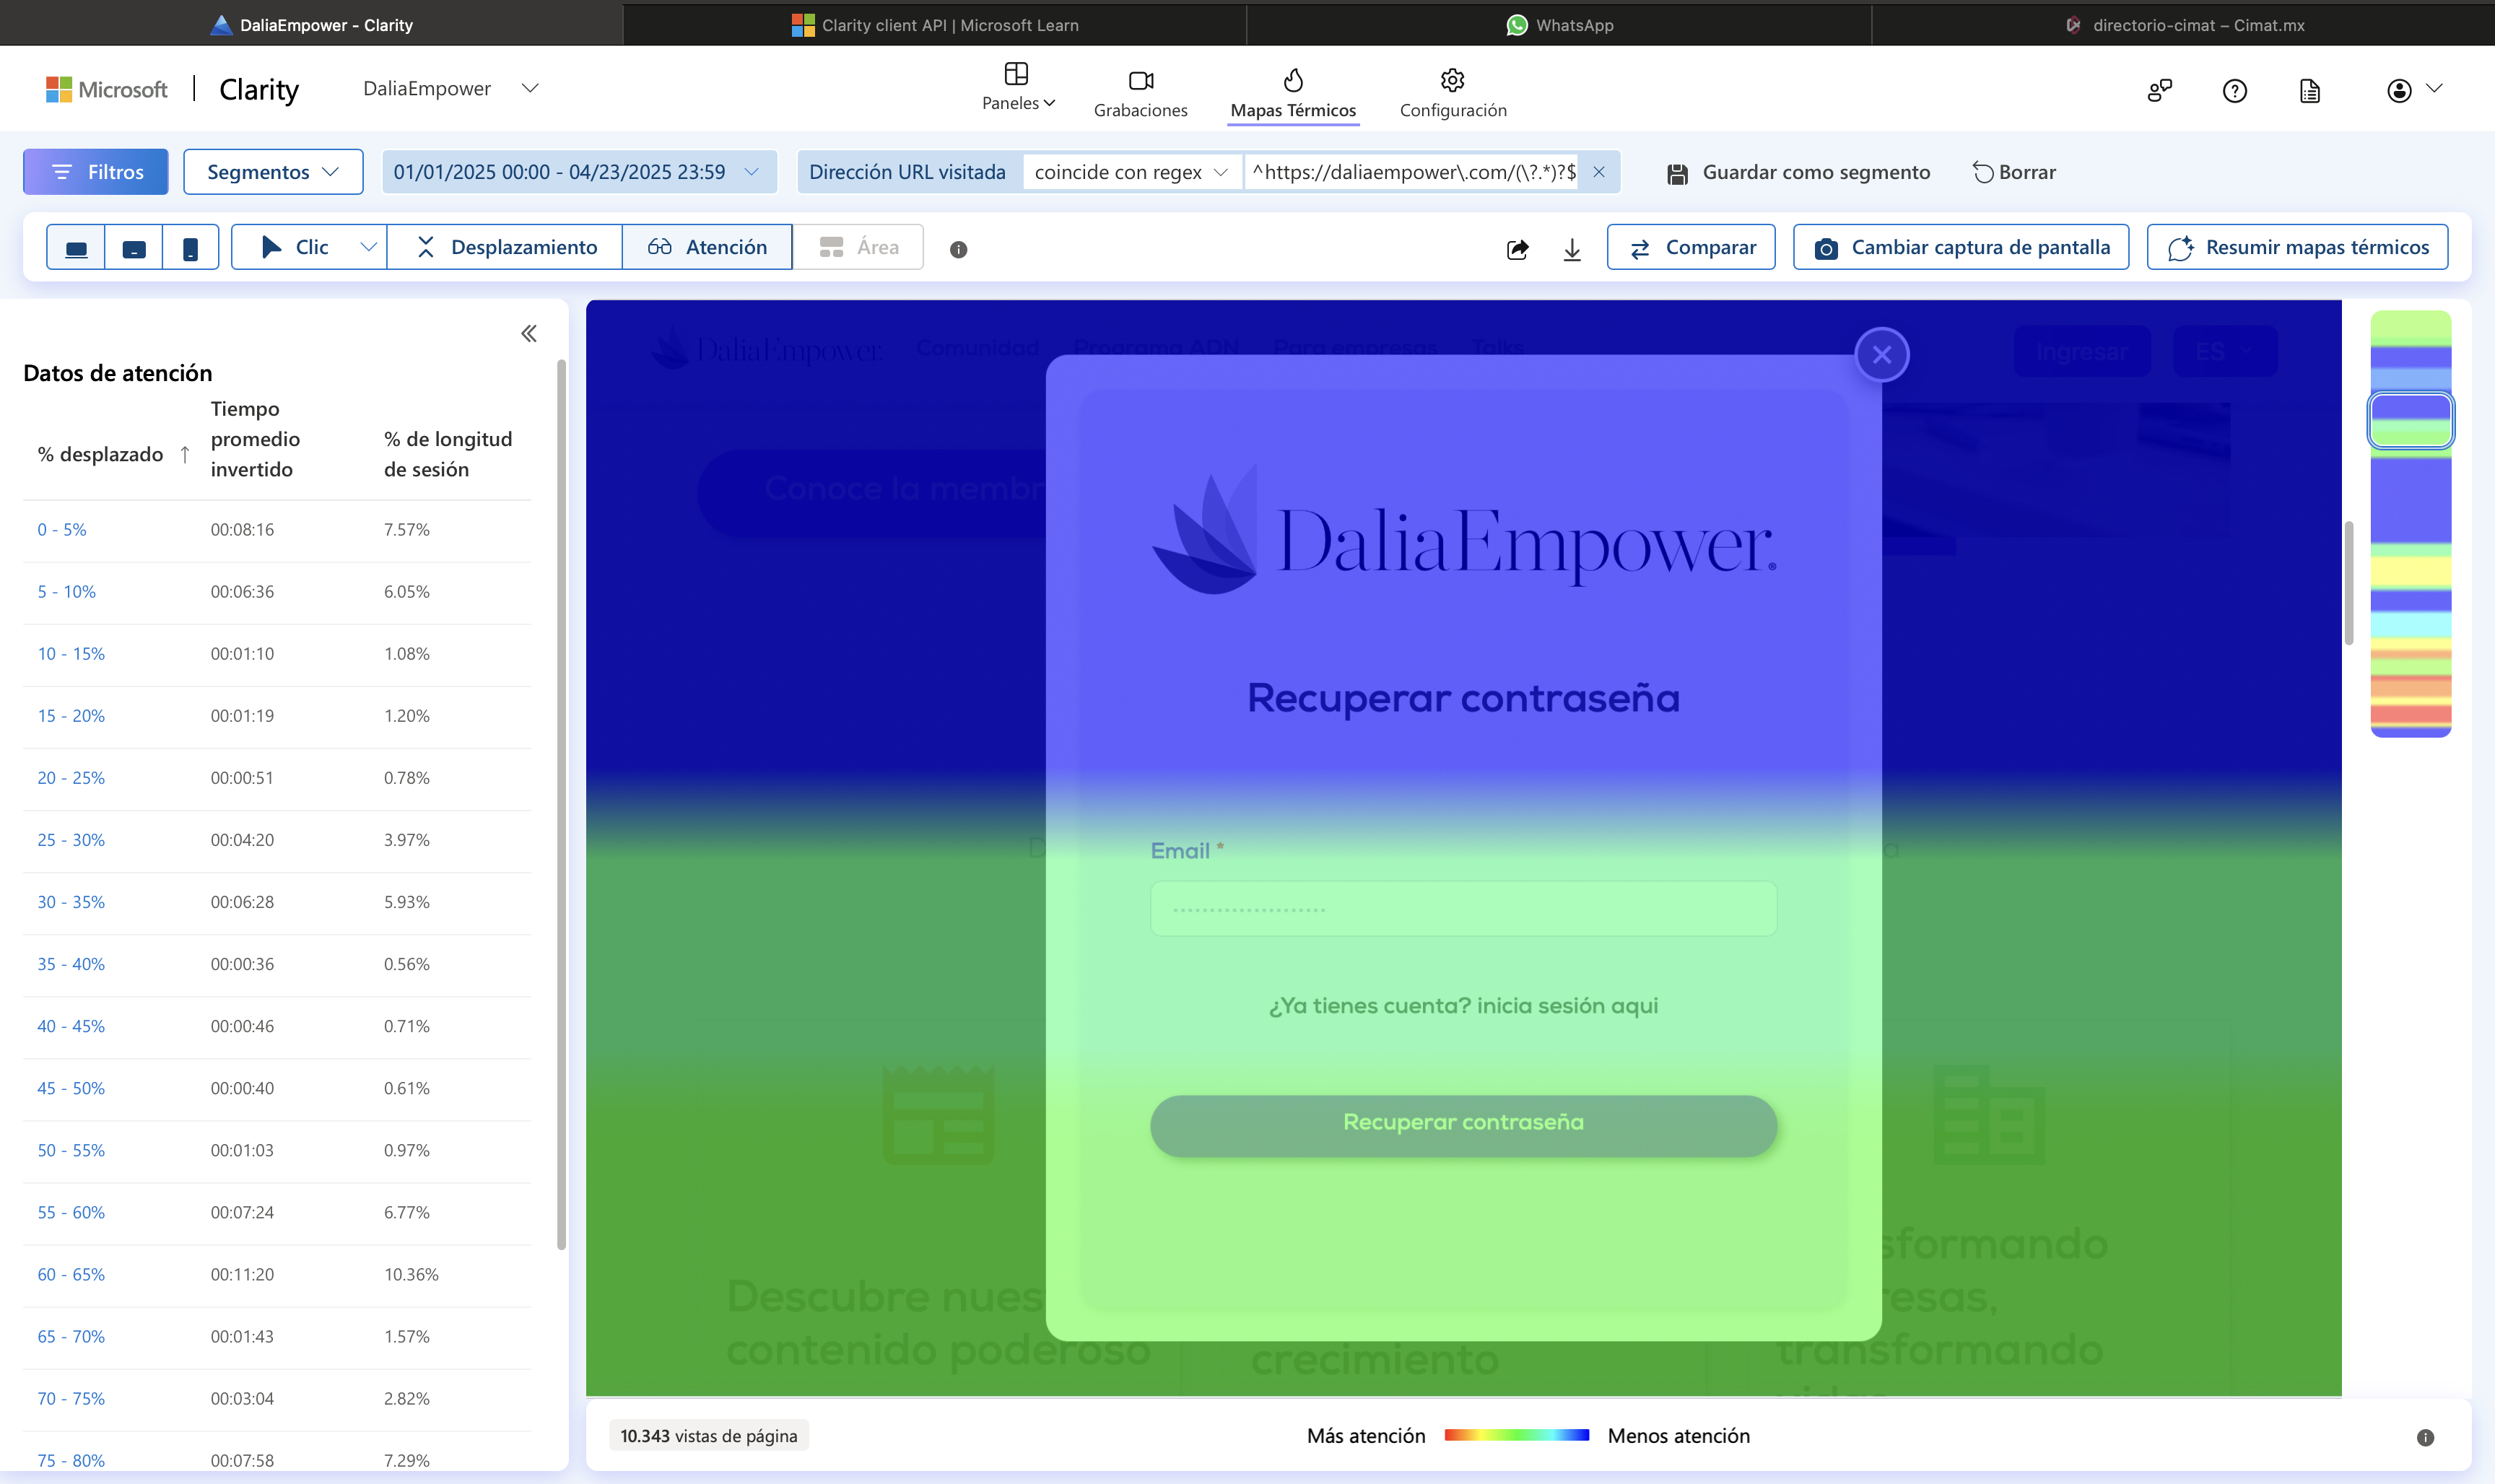

In [ ]:
from IPython.display import Image, display

display(Image('screen.png'))

In [ ]:
# Fibonacci aplicado a Optimización y Sistemas Dinámicos Discretos

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

sns.set(style="whitegrid")

In [ ]:
# Método de Fibonacci Search

def fibonacci_search(f, a: float, b: float, n: int) -> float:
    fib = [1, 1]
    for _ in range(2, n + 1):
        fib.append(fib[-1] + fib[-2])

    k = 0
    x1 = a + (fib[n - 2] / fib[n]) * (b - a)
    x2 = a + (fib[n - 1] / fib[n]) * (b - a)

    while k < n - 2:
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = a + (fib[n - k - 3] / fib[n - k - 1]) * (b - a)
        else:
            a = x1
            x1 = x2
            x2 = a + (fib[n - k - 2] / fib[n - k - 1]) * (b - a)
        k += 1

    return (x1 + x2) / 2


In [ ]:
# Simulación UX: Scroll Depth

def simulate_scroll_depth(length: float) -> float:
    noise = np.random.normal(0, 0.01)
    return -((length - 900)**2) / 10000 + 0.9 + noise


In [ ]:
# Visualización

def plot_function(f, x_range, title, xlabel, ylabel):
    x = np.linspace(*x_range, 200)
    y = [f(val) for val in x]
    plt.figure(figsize=(10, 5))
    ax = sns.lineplot(x=x, y=y, linewidth=2.2)
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
# Carga de JSON desde archivo local

def load_clarity_json(path: str) -> dict:
    with open(path, 'r') as f:
        return json.load(f)


def clarity_to_dataframe(raw_json: dict) -> pd.DataFrame:
    records = []
    for metric in raw_json:
        name = metric.get("metricName")
        info = metric.get("information", [])
        for entry in info:
            row = entry.copy()
            row["metricName"] = name
            records.append(row)
    return pd.DataFrame(records)


Longitud óptima estimada: 300 px


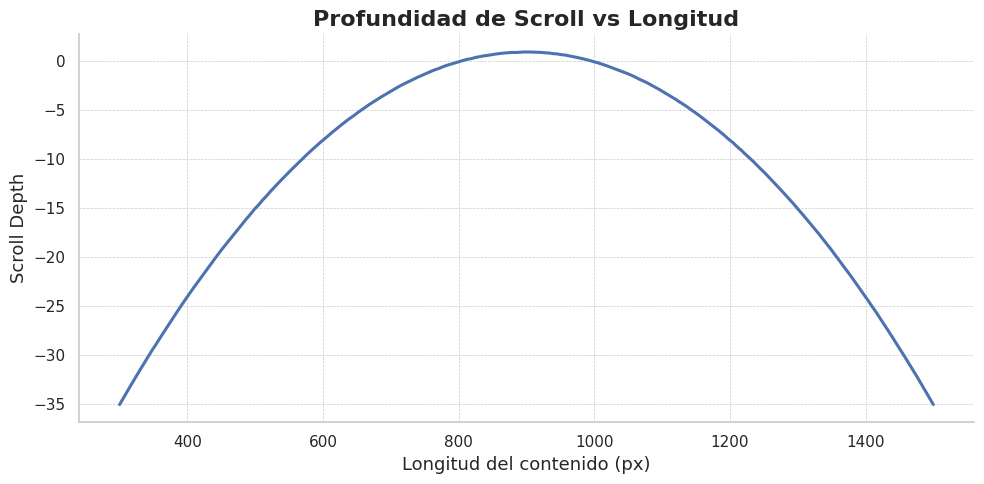

In [ ]:
# Optimización con Fibonacci

if __name__ == "__main__":
    opt_scroll = fibonacci_search(simulate_scroll_depth, 300, 1500, 20)
    print(f"Longitud óptima estimada: {opt_scroll:.0f} px")
    plot_function(simulate_scroll_depth, (300, 1500),
                  "Profundidad de Scroll vs Longitud",
                  "Longitud del contenido (px)",
                  "Scroll Depth")


## Recomendaciones de producto basadas en el análisis

| Longitud del contenido (px) | Interpretación UX                              | Recomendación de Producto                                 |
|-----------------------------|-------------------------------------------------|------------------------------------------------------------|
| < 600                       | Se percibe como incompleto o poco informativo  | Añadir contenido o dividir secciones demasiado pequeñas    |
| 600 – 1000                  | Alta profundidad de scroll, buena exploración  | Mantener o replicar esta estructura en otras secciones    |
| > 1000                      | Posible fatiga, menor exploración              | Considerar dividir el contenido o usar componentes plegables |


## Conclusión: ¿Por qué importa esto para el área de producto?

La optimización de la longitud del contenido no es solo un ejercicio técnico. Impacta directamente en cómo las personas interactúan con tu producto:

- Un módulo demasiado largo puede parecer abrumador, reducir la exploración y aumentar la tasa de rebote.

- Un módulo demasiado corto puede percibirse como irrelevante o incompleto.
- Usar modelos de comportamiento simulados y métodos como Fibonacci Search permite diseñar con intención, maximizando la atención y reduciendo la fricción, incluso sin hacer decenas de pruebas reales.


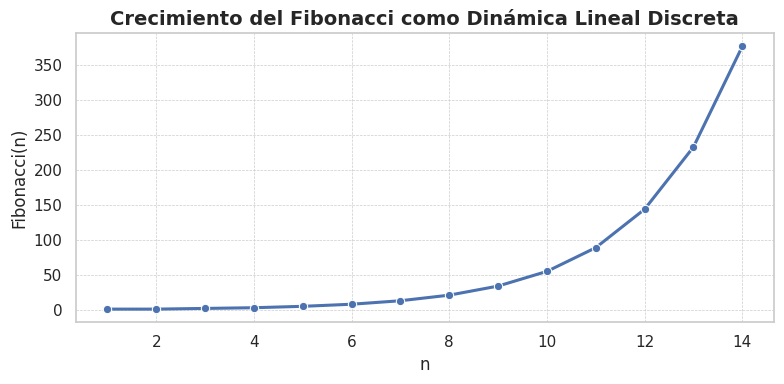

In [ ]:
# Interpretación Dinámica
def fibonacci_matrix(n: int) -> int:
    F = np.array([[1, 1], [1, 0]], dtype=object)
    result = np.linalg.matrix_power(F, n - 1)
    return result[0][0]

fibonacci_sequence = [fibonacci_matrix(i) for i in range(1, 15)]
plt.figure(figsize=(8, 4))
sns.lineplot(x=list(range(1, 15)), y=fibonacci_sequence, marker='o', linewidth=2.2)
plt.title("Crecimiento del Fibonacci como Dinámica Lineal Discreta", fontsize=14, fontweight="bold")
plt.xlabel("n", fontsize=12)
plt.ylabel("Fibonacci(n)", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Dinámica Discreta del Fibonacci: Modelado con Matrices

La sucesión de Fibonacci no solo es una herramienta útil para optimización, sino también un ejemplo clásico de **sistema dinámico discreto lineal**.

La visualización muestra cómo los valores de la sucesión crecen al aplicar la potencia de una matriz de transición:

$$
\begin{bmatrix}
F_n \\
F_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 \\
1 & 0
\end{bmatrix}^{n-1}
\cdot
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

Esto permite calcular el valor \( F_n \) en tiempo logarítmico mediante **exponenciación de matrices**, lo cual es una técnica clásica en sistemas dinámicos discretos.

Este sistema evoluciona únicamente en función de sus dos estados anteriores, y su comportamiento asintótico está dominado por el **autovalor mayor** de la matriz (la proporción áurea \( \phi \)).


**¿Qué observamos?**

- **Crecimiento exponencial**: el gráfico muestra cómo la secuencia se dispara a partir de los primeros términos.
- **Modelo matricial**: se logra este resultado sin usar recursión, sino mediante álgebra lineal (potencias de matrices).
- **Aplicación en clase**: este tipo de evolución es la base para estudiar estabilidad, comportamiento a largo plazo y convergencia en los sistemas dinámicos.
